In [5]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Membaca Data

In [6]:
# Membaca DF
df = pd.read_json("input/driver_income.json")
# Tampilkan 5 baris pertama
df.head()

,vehicle_id,tenure,ownership,avg_passenger,avg_milage_normalized,avg_duration,avg_distance_normalized,income
0,13006009578909,3,rent,2.114440,2.078768,0.211278,6.556613,22709.945569
1,358240053414231,2,rent,10.734419,0.504001,1.655938,0.815652,1494.552909
2,12336004843938,3,rent,0.796991,0.640769,1.558425,0.633661,56072.370862
3,12336009883541,4,rent,15.917807,0.323527,0.359985,2.257998,95292.025064
4,353285047053830,4,own,6.402184,1.825980,0.593083,0.780963,23822.013274


Sekarang kita akan melihat informasi dari DataFrame kita.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_id               10000 non-null  int64  
 1   tenure                   10000 non-null  int64  
 2   ownership                10000 non-null  object 
 3   avg_passenger            10000 non-null  float64
 4   avg_milage_normalized    10000 non-null  float64
 5   avg_duration             10000 non-null  float64
 6   avg_distance_normalized  10000 non-null  float64
 7   income                   10000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 703.1+ KB


# Membuat Visualisasii

## Vis 1: Pie Chart dari Rent vs Own

In [8]:
proportion = df.loc[:, "ownership"].value_counts(normalize=True) * 100
proportion

ownership
rent    70.74
own     29.26
Name: proportion, dtype: float64

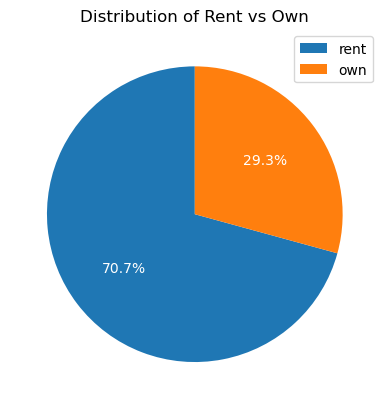

In [9]:
# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    proportion,
    labels=proportion.index,
    autopct="%1.1f%%",  # Show percentage with one decimal place
    startangle=90,  # Start the pie chart at the top
    textprops=dict(color="w"),  # Change text color for better readability
)

# Set title
plt.title("Distribution of Rent vs Own")

# Show the legend
plt.legend()

# Display the plot
plt.show()

**Pie Chart** adalah grafik melingkar yang dibagi menjadi irisan yang mewakili bagian yang berbeda dari keseluruhan (proporsi). Ini membantu Anda memvisualisasikan proporsi setiap kategori dalam dataset relatif terhadap total.

### Contoh:
Bayangkan Anda mensurvei 100 orang pada buah favorit mereka, dan hasilnya adalah:
- **Apel**: 40 orang
- **Pisang**: 30 orang
- **Ceri**: 20 orang
- **Anggur**: 10 orang

Dalam diagram lingkaran:
- Irisan apel akan memakan 40% dari kue.
- Irisan pisang akan memakan waktu 30%, dan seterusnya.

### Apa yang bisa Anda pelajari:
- **Proporsi**: Lihat kategori mana yang merupakan bagian terbesar atau terkecil dari keseluruhan.
- **Perbandingan**: Cepat membandingkan satu kategori dengan yang lain untuk melihat mana yang lebih umum atau kurang umum.

## Vis 2: Histogram dari Income

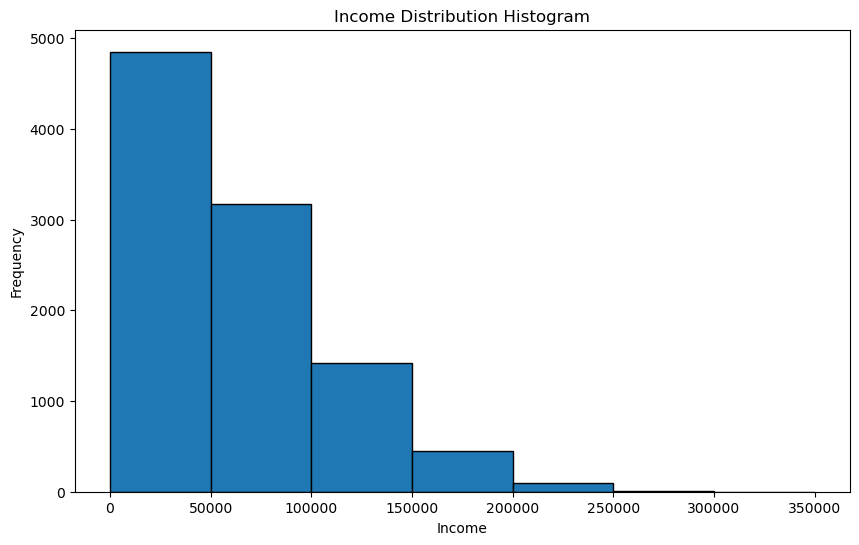

In [10]:
data = df.loc[:, "income"]

# Define the bin edges starting from 0 with a width of 10,000
bin_width = 50_000
max_income = data.max()
bins = list(range(0, int(max_income + bin_width), bin_width))

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, edgecolor="black")

# Add labels and title
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Distribution Histogram")
plt.xticks(bins)  # Set x-tick labels to match bin edges for clarity

# Display the plot
plt.show()

**Histogram** adalah jenis bagan batang yang menunjukkan seberapa sering nilai atau rentang nilai yang berbeda muncul dalam dataset. Ini membantu Anda memvisualisasikan distribusi data, membuat lebih mudah untuk melihat pola seperti bagaimana menyebar data dan di mana sebagian besar data jatuh.

### Contoh:
Bayangkan Anda memiliki data berikut yang mewakili usia orang dalam suatu kelompok: [5, 8, 12, 15, 18, 21, 21, 23, 30, 35, 40, 45].

Jika Anda membuat histogram dengan nampan usia 0-10, 10-20, 20-30, dll., ini akan menunjukkan:
- Bar untuk usia 0-10 dengan ketinggian yang mewakili jumlah orang berusia antara 0 dan 10.
- Bar lain untuk 10–20, dan seterusnya.

### Apa yang bisa Anda pelajari:
- **Puncak**: Bilah tinggi menunjukkan bahwa banyak titik data termasuk dalam kisaran itu.
- **Penyebaran**: Seberapa luas data di berbagai bin menunjukkan variabilitas dalam data.
- **Skewness**: Anda dapat melihat apakah data sebagian besar di satu sisi (miring kiri atau miring kanan) atau jika simetris.

## Vis 3: Histogram dari Average Passengers

In [11]:
df.head()

,vehicle_id,tenure,ownership,avg_passenger,avg_milage_normalized,avg_duration,avg_distance_normalized,income
0,13006009578909,3,rent,2.114440,2.078768,0.211278,6.556613,22709.945569
1,358240053414231,2,rent,10.734419,0.504001,1.655938,0.815652,1494.552909
2,12336004843938,3,rent,0.796991,0.640769,1.558425,0.633661,56072.370862
3,12336009883541,4,rent,15.917807,0.323527,0.359985,2.257998,95292.025064
4,353285047053830,4,own,6.402184,1.825980,0.593083,0.780963,23822.013274


In [12]:
avg_passenger = df.loc[:, "avg_passenger"].round().value_counts().sort_index()

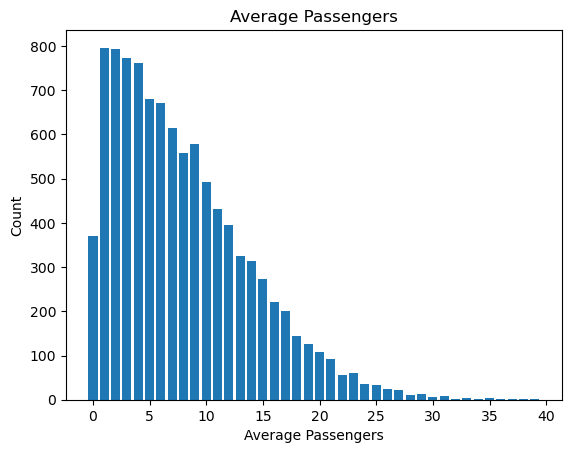

In [13]:
plt.bar(x=avg_passenger.index, height=avg_passenger.values)

plt.xlabel("Average Passengers")
plt.ylabel("Count")
plt.title("Average Passengers")
plt.show()

# Korelasi

## tenure vs income

In [14]:
# Extract x and y variables
x = df["tenure"]
y = df["income"]

# Calculate the linear regression to get the slope, intercept, and R-squared
result = stats.linregress(x, y)
r_value = result.rvalue
print(f"r-value = {r_value}")

r-value = -0.02383379818067533


r_value (koefisien korelasi):

Angka ini mengukur kekuatan dan arah hubungan antara x dan y.

Nilai ini berkisar dari -1 hingga 1:
- 1 berarti hubungan positif yang sempurna (seiring meningkatnya X, Y meningkat juga).
- -1 berarti hubungan negatif yang sempurna (saat X meningkat, y justru berkurang).
- 0 berarti tidak ada hubungan antara x dan y.

## avg_passenger vs income

In [15]:
# Extract x and y variables
x = df["avg_passenger"]
y = df["income"]

# Calculate the linear regression to get the slope, intercept, and R-squared
result = stats.linregress(x, y)
r_value = result.rvalue
print(f"r-value = {r_value}")

r-value = 0.3679030252164048


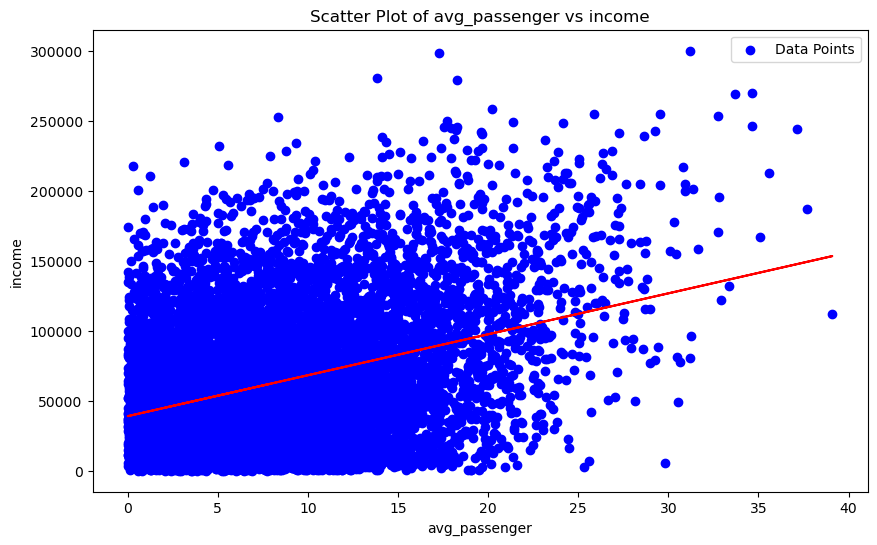

In [16]:
# Calculate the linear regression to get the slope, intercept, and R-squared
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(
    x,
    intercept + slope * x,
    color="red",
)

# Add labels, title, and legend
plt.xlabel("avg_passenger")
plt.ylabel("income")
plt.title("Scatter Plot of avg_passenger vs income")
plt.legend()

# Display the plot
plt.show()

## avg_duration vs income

In [17]:
# Extract x and y variables
x = df["avg_duration"]
y = df["income"]

# Calculate the linear regression to get the slope, intercept, and R-squared
result = stats.linregress(x, y)
r_value = result.rvalue
print(f"r-value = {r_value}")

r-value = 0.3903233107055766


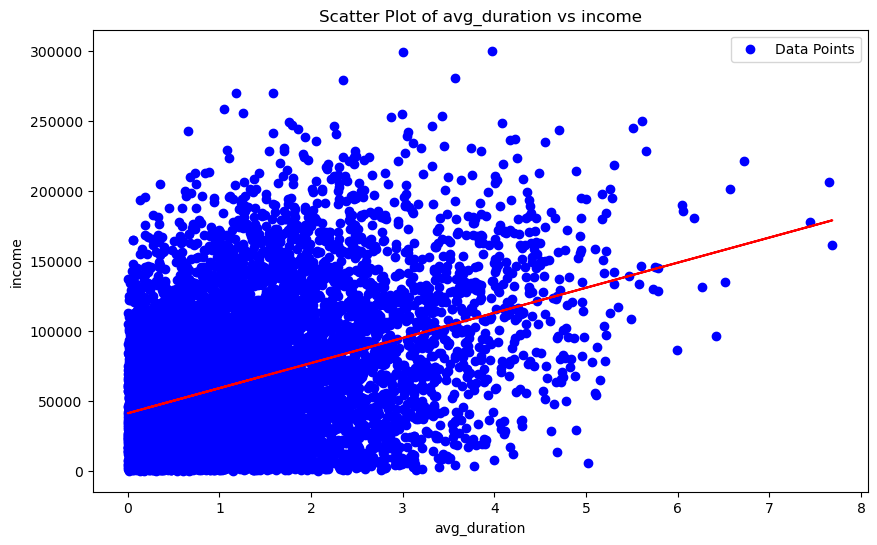

In [18]:
# Calculate the linear regression to get the slope, intercept, and R-squared
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(
    x,
    intercept + slope * x,
    color="red",
)

# Add labels, title, and legend
plt.xlabel("avg_duration")
plt.ylabel("income")
plt.title("Scatter Plot of avg_duration vs income")
plt.legend()

# Display the plot
plt.show()

# Modelling

## Pengertian

### Klasifikasi
**Klasifikasi** adalah jenis masalah dalam machine learning di mana kita mencoba mengelompokkan data ke dalam kategori atau kelas yang sudah ditentukan sebelumnya. Bayangkan kamu memiliki beberapa gambar kucing dan anjing, dan tugas kamu adalah membuat model yang bisa mengenali apakah gambar tersebut adalah **kucing** atau **anjing**. Model ini belajar dari contoh gambar yang sudah diberi label (kucing atau anjing) dan kemudian mengklasifikasikan gambar baru yang belum pernah dilihat sebelumnya.

Contoh kasus klasifikasi:
- Memprediksi apakah email masuk adalah **spam** atau **bukan spam**.
- Mengelompokkan jenis bunga menjadi **setosa**, **versicolor**, atau **virginica**.

### Regresi
**Regresi** adalah jenis masalah dalam machine learning di mana kita mencoba memprediksi nilai angka atau kuantitas yang bersifat **kontinu**. Misalnya, jika kamu ingin memprediksi harga rumah berdasarkan luas tanah, jumlah kamar, dan lokasi, maka model regresi akan membantu memprediksi harga rumah sebagai angka (bukan kategori).

Contoh kasus regresi:
- Memprediksi **harga saham** berdasarkan data historis.
- Menentukan **berat badan** seseorang berdasarkan tinggi badan dan usia.

### Perbedaan Utama
| Aspek        | Klasifikasi                     | Regresi                   |
|--------------|--------------------------------|---------------------------|
| Output       | Kategori/Kelas (misal: A, B)   | Angka/Kuantitas (misal: 100, 3.5) |
| Contoh Masalah | Spam/Non-spam, Sakit/Sehat     | Prediksi harga, Prediksi suhu |
| Algoritma    | Decision Tree, Random Forest, SVM | Linear Regression, Decision Tree Regression |

Jadi, singkatnya:
- Jika masalah kamu melibatkan memilih **kategori**, itu adalah **klasifikasi**.
- Jika masalah kamu melibatkan memprediksi **nilai angka**, itu adalah **regresi**.

## Impor library yang diperlukan

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor  # stochastic gradient descent
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

Lihat bagaimana data kita berbentuk.

In [20]:
df.head()

,vehicle_id,tenure,ownership,avg_passenger,avg_milage_normalized,avg_duration,avg_distance_normalized,income
0,13006009578909,3,rent,2.114440,2.078768,0.211278,6.556613,22709.945569
1,358240053414231,2,rent,10.734419,0.504001,1.655938,0.815652,1494.552909
2,12336004843938,3,rent,0.796991,0.640769,1.558425,0.633661,56072.370862
3,12336009883541,4,rent,15.917807,0.323527,0.359985,2.257998,95292.025064
4,353285047053830,4,own,6.402184,1.825980,0.593083,0.780963,23822.013274


## Buang kolom yang tidak perlu

Buang kolom vehicle_id karena tidak berguna untuk pemodelan.

In [21]:
df = df.drop(columns=['vehicle_id'])

## Tangani data kategorikal

Kolom `kepemilikan` adalah kategorikal, jadi kita perlu menggunakan one-hot encoding (OHE) untuk mengubahnya menjadi kolom numerik.

In [22]:
ohe = OneHotEncoder(sparse_output=False)
ownership_encoded = ohe.fit_transform(df[["ownership"]])

# Convert to a DataFrame
ownership_df = pd.DataFrame(
    ownership_encoded, columns=ohe.get_feature_names_out(["ownership"])
)

# Combine OHE columns with the original DataFrame
df = pd.concat([df, ownership_df], axis=1)
df = df.drop(columns=['ownership'])

df.head()

,tenure,avg_passenger,avg_milage_normalized,avg_duration,avg_distance_normalized,income,ownership_own,ownership_rent
0,3,2.114440,2.078768,0.211278,6.556613,22709.945569,0.0,1.0
1,2,10.734419,0.504001,1.655938,0.815652,1494.552909,0.0,1.0
2,3,0.796991,0.640769,1.558425,0.633661,56072.370862,0.0,1.0
3,4,15.917807,0.323527,0.359985,2.257998,95292.025064,0.0,1.0
4,4,6.402184,1.825980,0.593083,0.780963,23822.013274,1.0,0.0


## Pisahkan fitur dan target

Kita perlu mendefinisikan X (fitur) dan y (target).

### Apa itu **X**?
- **X** adalah **fitur** atau **variabel input**. Ini adalah data yang kita gunakan sebagai **masukan** untuk model. Bisa diibaratkan sebagai **faktor-faktor** yang akan mempengaruhi hasil akhir.
- Contoh:
  - Jika kita ingin memprediksi harga rumah, maka **X** bisa berupa: luas rumah, jumlah kamar, lokasi, dsb.
  - Jika kita ingin memprediksi apakah seorang pelanggan akan membeli produk, maka **X** bisa berupa: umur pelanggan, pendapatan, histori pembelian, dsb.

### Apa itu **y**?
- **y** adalah **target** atau **variabel output**. Ini adalah **hasil** atau **jawaban** yang ingin kita prediksi dengan model kita.
- Contoh:
  - Dalam kasus prediksi harga rumah, **y** adalah **harga rumah**.
  - Dalam kasus klasifikasi pelanggan, **y** adalah apakah pelanggan akan membeli produk (**ya/tidak**).

### Hubungan antara **X** dan **y**
- Model machine learning **belajar** dari hubungan antara **X** (fitur) dan **y** (target).
- Misalnya, kita memberikan data tentang luas rumah, jumlah kamar, dan lokasi (**X**) untuk memprediksi harga rumah (**y**).
- Model akan melihat pola dari data tersebut, dan ketika kita memberikan data baru (fitur baru), model bisa memberikan prediksi nilai targetnya.

Jadi, secara sederhana:
- **X** adalah **input**, apa yang kita ketahui.
- **y** adalah **output**, apa yang ingin kita prediksi.

In [23]:
X = df.drop(columns=['income'])
y = df['income']

## Pisahkan data

Pisahkan data menjadi set pelatihan dan pengujian.



### Apa itu **Training Set**?
- **Training set** adalah bagian dari data yang kita gunakan untuk **melatih** model machine learning. Model akan belajar dari data ini untuk memahami hubungan antara **fitur** (**X**) dan **target** (**y**).
- Bayangkan kamu belajar menghadapi ujian dengan mengerjakan soal-soal latihan. Soal-soal latihan ini adalah **training set** yang membantu kamu memahami materi.

Contoh:
- Kamu memiliki data 1.000 rumah dengan informasi luas rumah, jumlah kamar, dan harga rumah.
- Dari data ini, 800 rumah digunakan untuk melatih model dan mencari pola dari hubungan luas rumah dan harga. Ini disebut **training set**.

### Apa itu **Test Set**?
- **Test set** adalah bagian dari data yang digunakan untuk **menguji** model setelah model selesai dilatih. Data ini tidak pernah dilihat oleh model saat pelatihan, sehingga test set digunakan untuk melihat seberapa baik model bisa memprediksi hasil yang benar.
- Bayangkan test set seperti soal ujian sebenarnya. Setelah belajar dengan soal latihan (**training set**), kamu diuji dengan soal ujian baru yang belum pernah kamu lihat.

Contoh:
- Dari data 1.000 rumah tadi, 200 rumah digunakan sebagai **test set** untuk menguji model. Kita akan melihat apakah model bisa memprediksi harga rumah dengan akurat menggunakan data ini.

### Mengapa Memisahkan **Training Set** dan **Test Set** itu Penting?
- Memisahkan data menjadi **training set** dan **test set** membantu kita menilai apakah model benar-benar **belajar dengan baik** atau hanya **mengingat data**.
- Jika kita tidak menggunakan test set, model bisa saja terlihat sangat akurat saat diuji, tetapi sebenarnya hanya menghafal data tanpa memahami pola sebenarnya. Ini disebut **overfitting**.

### Kesimpulan:
- **Training set**: Digunakan untuk **melatih** model, agar model belajar pola dari data.
- **Test set**: Digunakan untuk **menguji** model, agar kita tahu seberapa baik model bisa memprediksi hasil yang benar dengan data baru.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Standarisasi data

Gunakan `StandardsCaler` untuk menstandarkan fitur untuk kinerja model yang lebih baik.

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Buat dan Latih model Gradient Descent

Gunakan `sgdregressor` untuk regresi linier dengan gradient descent.

In [26]:
# Create model
model = SGDRegressor()

# Train model
model.fit(X_train, y_train)

SGDRegressor()

## Evaluasi model

Buat prediksi dan evaluasi model menggunakan rata-rata kesalahan kuadrat (MSE).

In [27]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 32182.74


Secara rata-rata, prediksi kita selisih 32182.74 terhadap hasil actual.

Semakin kecil error, semakin bagus.